In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#a = []
# a.append(np.genfromtxt("Stochastic30calls1000.csv", delimiter=" "))
# a.append(np.genfromtxt("Stochastic35calls1000.csv", delimiter=" "))
# a.append(np.genfromtxt("Stochastic40calls1000.csv", delimiter=" "))
# a.append(np.genfromtxt("Stochastic45calls1000.csv", delimiter=" "))
# a.append(np.genfromtxt("Stochastic50calls1000.csv", delimiter=" "))


In [23]:
a[4].shape

(1000,)

(0.0, 100.0)

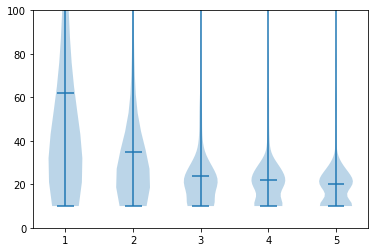

In [5]:
plt.violinplot(a,showmeans=True)
plt.ylim([0, 100])

In [3]:
original_data = (np.genfromtxt("backend_calls.csv", delimiter=","))
original_data_s = (np.genfromtxt("backend_calls.csv", delimiter=",", dtype = str))

In [4]:
original_data_s[0,6:]

array(['Time_Assigned', 'Time_Enroute', 'Time_ArrivedAtScene',
       'Time_Depart_Scene', 'Time_Arrive_Destination', 'Time_Available',
       'Time_Call_Cleared', 'Call_Disposition', 'Longitude_Of_Emergency',
       'Latitude_Of_Emergency', 'transport_time', 'grid_time',
       'Time_Arrived', 'timedelta', 'arrival_seconds',
       'interarrival_seconds', 'neighborhood', 'dow'], dtype='<U30')

In [20]:
ncalls = 1000;
travel_time = original_data[1:ncalls,-8];
travel_time = travel_time / 60;
grid_time = original_data[1:ncalls,-7];
grid_time = grid_time / 60;
stoch40 = np.genfromtxt("Stochastic40calls1000.csv", delimiter=" ");
stoch50 = np.genfromtxt("Stochastic50calls1000.csv", delimiter=" ");
robust40 = np.genfromtxt("Robust0140calls1000.csv", delimiter=" ");
robust50 = np.genfromtxt("Robust0150calls1000.csv", delimiter=" ");

In [71]:
#0 minute travel time is impossible, so should we delete it?
travel_time 
zero_ind = np.where(travel_time >= 1)
np.mean(travel_time[zero_ind])
travel_time = travel_time[zero_ind]

In [67]:
np.mean(robust50)

7.755850000000001

In [68]:
np.mean(stoch50) * .92 
#travel time -8.147
#robust - 7.75
#stochastic - 8.34

8.347083333333332

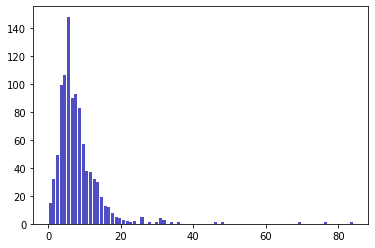

In [53]:
# Density plot
n, bins, patches = plt.hist(x=travel_time, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

(0.0, 20.0)

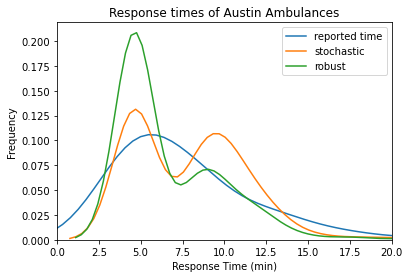

In [72]:
modifier = .92
sns.kdeplot(travel_time)
#sns.kdeplot(grid_time)
#sns.kdeplot(stoch40*modifier)
sns.kdeplot(stoch50*modifier)
#sns.kdeplot(robust40*modifier)
sns.kdeplot(robust50*modifier)
plt.legend(['reported time', 'stochastic', 'robust'])
plt.xlabel("Response Time (min)")
plt.ylabel("Frequency")
plt.title("Response times of Austin Ambulances")
plt.xlim([0, 20])